
<br>
    The objective of this exercise is that you analyse the code provided and<br>
    make the link with the curse. You have to provide a short report that<br>
    comments and analyse the results. You can use directly the results or adapt<br>
    them to you needs.<br>


import the numerical library

In [1]:
import numpy as np
# import signal processing library
import scipy.signal as sp
# import ploting library
import pylab as py
py.ion()
py.close('all')

load the ecg signal

In [2]:
x = np.genfromtxt('accel.dat')
# sampling frequency of the signal is 500 Hz
fs = 40
# generate correponding time vector
t = np.arange(len(x))/fs


 <br>
    The signal is an acceleration signal measured at the wrist.<br>
    The signal records the acceleration during the hand washing protocol in an<br>
    hospital. The goal is to detect the hand washing sequence.<br>
    The hand washing protocol produced rhythmical movements.<br>
    The protocol is known to take place between 20 and 30 seconds.<br>



 <br>
    Plot time signal.<br>
    Q: Comment the figure.<br>


The amplitude is very large and the signal is very compact. Therefore, we cannot see much and analyze from this figure in details. But we can see that the hand washing is taking place between 20 and 30 seconds as the acceleration is faster and a periodicity of the movement is present than in the other part of the signal. Indeed, outside this interval, the hand movements are lower in amplitude.

Compute the FFT of the signal

In [3]:
x_fft = np.fft.fft(x)
# Determine the frequency scale
f_fft = np.arange(len(x_fft))/len(x_fft)*fs

plot the signal

Text(0.5, 1.0, 'acceleration signal signal')

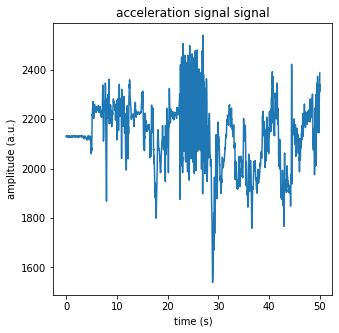

In [4]:
py.figure(1, figsize=[5,5])
py.clf()
py.plot(t, x)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('acceleration signal signal')


 <br>
    High pass the signal.<br>
    Q: Comment the figure.<br>


The application of an high pass filter has been done on the signal with a cutoff frequency of 0.5Hz.  We can see that the range of amplitude is much better. The upper plot represent the application of this filter and the lower plot a zoom of the hand washing sequence.  We see between 22 and 28 s, we have a series of small amplitude movements at high frequencies, which is what we expected from a washing sequence. But there is still some high frequencies that could be noises.


high-pass filter with cutoff frequency of 0.5 Hz

In [5]:
b, a = sp.butter(4, 0.5/fs*2, btype='high')
# zero-phase filtering of the signal
x_hp = sp.filtfilt(b, a, x)

(20.0, 30.0)

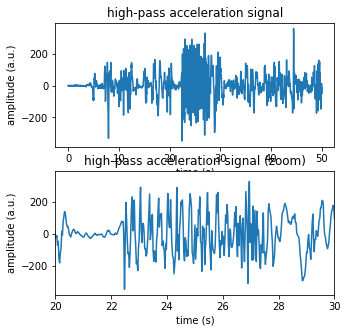

In [8]:
py.figure(2, figsize=[5,5])
py.clf()
py.subplot(2,1,1)
py.plot(t, x_hp)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('high-pass acceleration signal')
py.subplot(2,1,2)
py.plot(t, x_hp)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('high-pass acceleration signal (zoom)')
py.xlim(20, 30)


<br>
    Band pass the signal between 2.4 and 3.2 Hz.<br>
    Q: Based on previous figure, comment the selection of the frequencies.<br>
We select the frequencies that correspond to the sequence of interest and we don't want frequencies that are outside. It gives us a sinusoidal signal, which is smooth. The amplitude of the washing sequence is also much bigger which is what we are looking for.  
    Q: Why zero phase filter (filtfilt) is used?<br>

So we don’t have any offset because we want to know exactly when the person is washing their hand. A zero phase filter can be used in our case because we know the full-time range of our signal.

Analogic limit of the passband frequency

In [9]:
f_pass = np.array([2.4, 3.2])
# Analogic limit of the stopband frequency
f_stop = np.array([0, 5])
# Convertion into Nyquist frequency
f_pass_N = f_pass/fs*2
f_stop_N = f_stop/fs*2
# Max attenutation in passband (dB)
g_pass = 3
# Min attenuation in stopband (dB)
g_stop = 40
# Determine the order and the cutoff frequency of a butterworth filter
ord, wn = sp.buttord(f_pass_N, f_stop_N, g_pass, g_stop)
# Compute the coeffcients of the filter
b, a = sp.butter(ord, wn, btype='band')
# Filter the signal
x_bp = sp.filtfilt(b ,a, x_hp)

(20.0, 30.0)

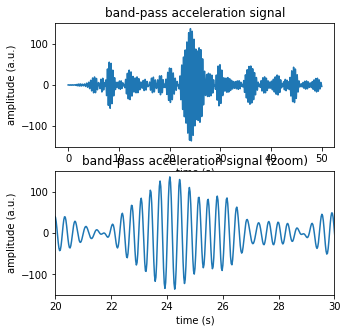

In [10]:
py.figure(3, figsize=[5,5])
py.clf()
py.subplot(2,1,1)
py.plot(t, x_bp)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('band-pass acceleration signal')
py.subplot(2,1,2)
py.plot(t, x_bp)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('band-pass acceleration signal (zoom)')
py.xlim(20, 30)


<br>
    Low-pass filter of the power of the band-pass signal.<br>
    Q: Why use the power of the acceleration signal?<br>
With the band-pass acceleration signal and with the application of a low-pass filter, the detection of the squared-value can occur. This value helps to increase the difference of amplitude between the event and the rest. It helps to assess when the washing occurs. The movement of washing generates a lot of accelerations.
    Q: How the detection of hand washing is obtained?<br>
With the low-pass filtered squared value, a treshold can be applied which helps detect the event.

Analogic limit of the passband frequency

In [11]:
f_pass = 0.4
# Analogic limit of the stopband frequency
f_stop = 0.8
# Convertion into Nyquist frequency
f_pass_N = f_pass/fs*2
f_stop_N = f_stop/fs*2
# Max attenutation in passband (dB)
g_pass = 3
# Min attenuation in stopband (dB)
g_stop = 40
# Determine the order and the cutoff frequency of a butterworth filter
ord, wn = sp.buttord(f_pass_N, f_stop_N, g_pass, g_stop)
# Compute the coeffcients of the filter
b, a = sp.butter(ord, wn)
# Filter the signal
x_pow = sp.filtfilt(b ,a, x_bp**2)
# detection
det = x_pow > 2000

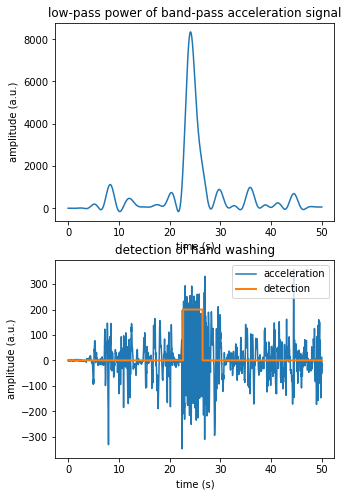

In [12]:
py.figure(4, figsize=[5,8])
py.clf()
py.subplot(2,1,1)
py.plot(t, x_pow)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('low-pass power of band-pass acceleration signal')
py.subplot(2,1,2)
py.plot(t, x_hp, label='acceleration')
py.plot(t, det*200, linewidth=2, label='detection')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('detection of hand washing')
py.legend(loc='upper right')